In [116]:
import numpy as np
import matplotlib.pyplot as plt
from bitarray import bitarray

In [110]:
channel = np.genfromtxt('channel.csv', delimiter=',')
file1 = np.genfromtxt('file1.csv', delimiter=',')

H = np.fft.fft(channel, n=1024)

In [112]:
constellation_map = {
    '00' : complex(1/np.sqrt(2), 1/np.sqrt(2)),
    '01' : complex(-1/np.sqrt(2), 1/np.sqrt(2)),
    '11' : complex(-1/np.sqrt(2), -1/np.sqrt(2)),
    '10' : complex(1/np.sqrt(2), -1/np.sqrt(2)),
}

QPSK_symbols = np.array([*constellation_map.values()])
QPSK_bits = np.array([*constellation_map.keys()])

In [113]:
bits = ''

# Iterate for the number of blocks in the files
for i in range(file1.shape[0] // 1056):
    
    # Extract the block of length 1056
    block = file1[i*1056: (i+1)*1056]
    
    # Extract the symbol (ignoring length 32 guard)
    symbol = block[32:]
    
    # Take fft of the received symbol
    R = np.fft.fft(symbol)
    
    # Normalise X (some root(N) factor crept in from numpy)
    X /= np.sqrt(1024)
    
    # Decode each information QAM symbol using min distance
    # Only use symbols 1 to 511 since they are the only ones with information.
    for symbol in X[1:512]:
        bits += QPSK_bits[(np.abs(QPSK_symbols - symbol)).argmin()]

In [117]:
# Convert to bytes and print
byte_list = bitarray(bits).tobytes()
byte_list

b'files/3829010287.tiff\x00121206\x00II*\x002\xd8\x01\x00\x7fjoGptIswHrwBw{D}\x80J\x85\x88L\x89\x8bK\x8d\x8fP\x96\x99W\x9e\xa1^\xa3\xa6b\xa7\xa9e\xab\xack\xab\xadl\xaa\xacl\xa7\xa9m\xa0\xa3k\x9a\x9ci\x95\x96m\x92\x91n\x94\x93t\x96\x94x\x99\x97}\x9c\x9a\x80\x9c\x9b\x81\x9a\x9a\x7f\x97\x98z\x99\x9bz\x9b\x9dy\x99\xa5\xb1\x95\xcc\xbc\xcc\xe0\xc8\xe4\xc0\xc4\xc0\xc8\xe0\xdc\xb9\xd1\xa5\x99\x98\x00\xc4\xc8\xc4\xc8\xc0\xd8\x01%$\xa8\x00\xcb`\x04\x01\xfd\xa9\xbd\x1d\xc1\xd1%\xcd\xdd!\xc9\xdd\t\xdd\xed\x11\xf6\x01*\x16!2&-.6=BZe^z\x85z\x8e\x99\x8a\x9e\xa5\x96\xae\xb1\xae\xae\xb5\xb2\xaa\xb1\xb2\x9e\xa5\xb6\x82\x8d\xaejq\xa6VY\xb6JE\xbaRM\xd2ZQ\xe2f]\xf6rj\x02rn\x06ji\xfe^a\xeafm\xeanu\xe6f\x96\xc6W2\xf33\x83#\x93\x03\x13\x03#\x83r\xe7F\x96f`\x03\x13#\x13#\x03`\x04\x94\x92\xa0\x03-\x80\x10\x07\xf6\xa6\xf4w\x07D\x977t\x87\'t\'w\xb4G\xd8\x04\xa8X\x84\xc8\x98\xb4\xb8\xd8\xf5\ti\x95y\xea\x15\xea:f*z\x96Z\xba\xc6\xba\xba\xd6\xca\xaa\xc6\xcaz\x96\xda\n6\xb9\xa9\xc6\x99Yf\xd9)\x16\xe9I7IiG\x89\x99w\xd9

## Working out!

In [3]:
file1[:50]

array([ 0.451182 ,  0.501358 , -0.166754 ,  0.226595 ,  0.940525 ,
        0.303765 , -0.956491 ,  1.54041  ,  0.890009 , -0.539382 ,
        0.82016  ,  0.910138 , -0.357145 , -0.956386 ,  1.20226  ,
        0.146937 , -1.09296  , -0.341061 ,  0.709406 , -0.261393 ,
       -1.15171  , -0.0882301,  0.425557 ,  0.875736 ,  0.308802 ,
       -1.33266  ,  0.808567 , -0.90325  , -2.41721  ,  1.95424  ,
        1.91445  , -1.54641  ,  1.55497  ,  2.35208  , -2.82151  ,
       -0.570202 ,  1.68704  , -2.39321  , -1.90369  ,  2.59878  ,
       -1.05986  , -1.08882  ,  0.281377 ,  0.296916 , -0.90124  ,
        0.756779 ,  0.847136 , -0.938502 , -1.33379  ,  0.92006  ])

In [4]:
channel.shape

(30,)

In [5]:
file1.shape

(1003200,)

In [111]:
1003200//1056

950

In [7]:
block = file1[:1056]
block.shape

(1056,)

In [8]:
symbol = block[32:]
symbol.shape

(1024,)

In [9]:
R = np.fft.fft(symbol)
H = np.fft.fft(channel, n=1024)

/Users/matthewbarker/opt/anaconda3/envs/scienv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


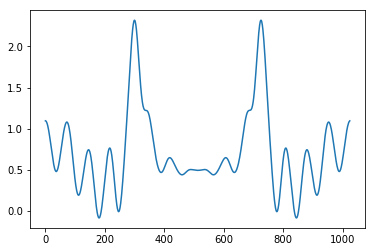

In [10]:
plt.plot(H)

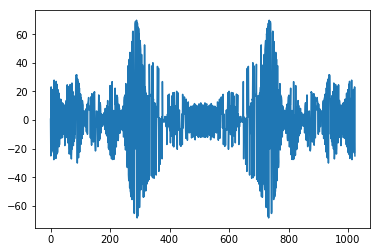

In [11]:
plt.plot(R)

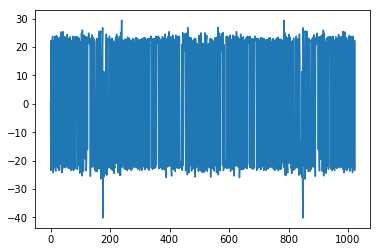

In [12]:
X = R/H
plt.plot(X)

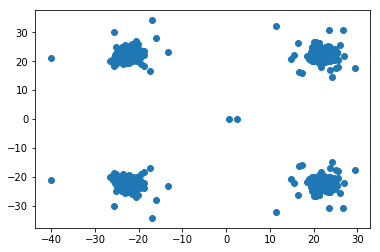

In [13]:
plt.scatter(np.real(X), np.imag(X))

In [14]:
X

array([  0.64395401 +0.j        , -23.37220042+23.51383688j,
        22.32089867-22.66471819j, ..., -22.74077391-22.91392517j,
        22.32089867+22.66471819j, -23.37220042-23.51383688j])

In [15]:
# Need to correct for size of X
X /= np.sqrt(1024)
np.abs(X)

array([0.02012356, 1.03604957, 0.99408012, ..., 1.00884311, 0.99408012,
       1.03604957])

In [60]:
constellation_map = {
    '00' : complex(1/np.sqrt(2), 1/np.sqrt(2)),
    '01' : complex(-1/np.sqrt(2), 1/np.sqrt(2)),
    '11' : complex(-1/np.sqrt(2), -1/np.sqrt(2)),
    '10' : complex(1/np.sqrt(2), -1/np.sqrt(2)),
}

In [61]:
constellation_map

{'00': (0.7071067811865475+0.7071067811865475j),
 '01': (-0.7071067811865475+0.7071067811865475j),
 '11': (-0.7071067811865475-0.7071067811865475j),
 '10': (0.7071067811865475-0.7071067811865475j)}

In [62]:
QPSK_symbols = np.array([*constellation_map.values()])
QPSK_bits = np.array([*constellation_map.keys()])

In [63]:
QPSK_symbols

array([ 0.70710678+0.70710678j, -0.70710678+0.70710678j,
       -0.70710678-0.70710678j,  0.70710678-0.70710678j])

In [64]:
QPSK_bits

array(['00', '01', '11', '10'], dtype='<U2')

In [65]:
bits = ''
for symbol in X[1:512]:
    bits += QPSK_bits[(np.abs(QPSK_symbols - symbol)).argmin()]

In [66]:
bits

'011001100110100101101100011001010111001100101111001100110011100000110010001110010011000000110001001100000011001000111000001101110010111001110100011010010110011001100110000000000011000100110010001100010011001000110000001101100000000001001001010010010010101000000000001100101101100000000001000000000111111101101010011011110100011101110000011101000100100101110011011101110100100001110010011101110100001001110111011110110100010001111101100000000100101010000101100010000100110010001001100010110100101110001101100011110101000010010110100110010101011110011110101000010101111010100011101001100110001010100111101010010110010110101011101011000110101110101011101011010110110010101010101011000110110010100111101010010110110110100000101000110110101110011010100111000110100110010101100101100110110110010010100100010110111010010100100100110111010010010110100101000111100010011001100101110111110110011100100110101000000010011100100110111000000110011010100110100111111110010111100110000111101010011001100110110111101

In [77]:
byte_list = bitarray(bits).tobytes()
byte_list

b'files/3829010287.tiff\x00121206\x00II*\x002\xd8\x01\x00\x7fjoGptIswHrwBw{D}\x80J\x85\x88L\x89\x8bK\x8d\x8fP\x96\x99W\x9e\xa1^\xa3\xa6b\xa7\xa9e\xab\xack\xab\xadl\xaa\xacl\xa7\xa9m\xa0\xa3k\x9a\x9ci\x95\x96m\x92\x91n\x94\x93t\x96\x94x\x99\x97}\x9c\x9a\x80\x9c\x9b\x81\x9a\x9a\x7f\x97\x98z\x99\x9bz\x9b\x9dx'